# Step 1: Installation and Setup

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os, sys
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split

# Step 2: Data Preprocessing

In [2]:
# Importing the dataset 
from PIL import Image
import os, sys
path = "."

dirs_train_o = os.listdir(path + "/TRAIN/O")
dirs_train_r = os.listdir(path + "/TRAIN/R")
dirs_test_o = os.listdir(path + "/TEST/O")
dirs_test_r = os.listdir(path + "/TEST/R")

In [3]:
# Resize image using Pillow
class_name = ['O', 'R']
# Create training set
x_train = []
x_train.append(dirs_train_o)
x_train.append(dirs_train_r)

# Create testing test
x_test = []
x_test.append(dirs_test_o)
x_test.append(dirs_test_r)

def modify_image(dataset, pathname):
  names = []
  labels = []
  for type in range(2):
    for item in dataset[type]:
      path_tmp = path + "/" + pathname + "/" + class_name[type] + "/"
      if os.path.isfile(path_tmp+item):
        im = Image.open(path_tmp+item)
        imResize = im.resize((32, 32), Image.ANTIALIAS)
        if imResize.mode != 'RGB':
          imResize = imResize.convert('RGB')
        names.append(imResize)
        labels.append(type)
  return names, labels

names_train, labels_train = modify_image(x_train, "TRAIN")
names_test, labels_test = modify_image(x_test, "TEST")
print("Done")

Done


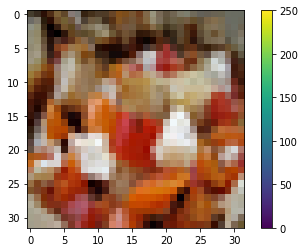

In [4]:
# Train
x_train = np.array([np.array(fname) for fname in names_train])
y_train = np.array(labels_train)

# Test
x_test = np.array([np.array(fname) for fname in names_test])
y_test = np.array(labels_test)

# Data Exploration
x_train.shape, y_train.shape
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()

# Normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

# Fully-connected Model

In [6]:
fc_model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(32,32,3)), 
                                       tf.keras.layers.Dense(128, activation='relu'),
                                       tf.keras.layers.Dense(units=1, activation='sigmoid')])
fc_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 393,473
Trainable params: 393,473
Non-trainable params: 0
_________________________________________________________________


In [12]:
fc_model.compile(optimizer= 'Adam', loss='binary_crossentropy', metrics=['accuracy'])

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
fc_history = fc_model.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
1444/1444 [==============================] - 2s 1ms/step - loss: 0.4498 - accuracy: 0.7983 - val_loss: 0.4358 - val_accuracy: 0.8131
Epoch 2/20
1444/1444 [==============================] - 2s 1ms/step - loss: 0.4475 - accuracy: 0.7988 - val_loss: 0.4379 - val_accuracy: 0.8122
Epoch 3/20
1444/1444 [==============================] - 2s 1ms/step - loss: 0.4451 - accuracy: 0.8029 - val_loss: 0.4397 - val_accuracy: 0.8089
Epoch 4/20
1444/1444 [==============================] - 2s 1ms/step - loss: 0.4445 - accuracy: 0.8012 - val_loss: 0.4358 - val_accuracy: 0.8145
Epoch 5/20
1444/1444 [==============================] - 2s 1ms/step - loss: 0.4389 - accuracy: 0.8044 - val_loss: 0.4414 - val_accuracy: 0.8169
Epoch 6/20
1444/1444 [==============================] - 2s 1ms/step - loss: 0.4395 - accuracy: 0.8024 - val_loss: 0.4731 - val_accuracy: 0.8031
Epoch 7/20
1444/1444 [==============================] - 2s 1ms/step - loss: 0.4389 - accuracy: 0.8037 - val_loss: 0.4385 - val_accuracy:

In [16]:
eval = fc_model.evaluate(x_test, y_test)
print ("Loss = " + str(eval[0]))
print ("Test Accuracy = " + str(eval[1]))

y_pred = fc_model.predict(x_test)

79/79 [==============================] - 0s 934us/step - loss: 0.3946 - accuracy: 0.8579
Loss = 0.39455822110176086
Test Accuracy = 0.8579387068748474


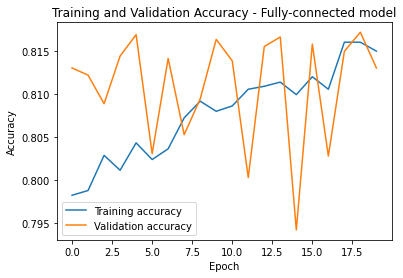

In [17]:
acc = fc_history.history['accuracy']
val_acc = fc_history.history['val_accuracy']
loss = fc_history.history['loss']
val_loss = fc_history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Training and Validation Accuracy - Fully-connected model")
plt.legend()
plt.savefig("acc-Fully-connected model")

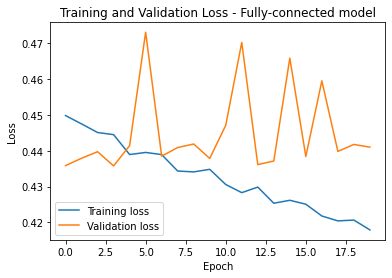

In [18]:
plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training and Validation Loss - Fully-connected model")
plt.legend()
# plt.figure()
plt.savefig("loss-Fully-connected model")

In [20]:
names = ["Organic", "Recyclable"]
print("Classification report on 2513 samples - Fully-connected model:")
print()
print(classification_report(y_test, y_pred.round(), target_names=names))

Classification report on 2513 samples - Fully-connected model:

              precision    recall  f1-score   support

     Organic       0.81      0.97      0.88      1401
  Recyclable       0.94      0.72      0.82      1112

    accuracy                           0.86      2513
   macro avg       0.88      0.84      0.85      2513
weighted avg       0.87      0.86      0.85      2513

